In [1]:
import torch
from torch import nn
from sklearn.datasets import make_classification, make_moons

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def perceptron_plot_3d(perceptron):
    # Desempacotamento dos pesos e viés
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()
    # Construção da malha para plot
    x1 = np.linspace(-1, 1, 10)  # x
    x2 = np.linspace(-1, 1, 10)  # y
    x1, x2 = np.meshgrid(x1, x2)
    # Cálculo da variável resposta
    x3 = -(b + w1*x1 + w2*x2)/w3
    # Plot
    fig = plt.figure(figsize=(14,8))
    ax = fig.gca(projection='3d')
    #ax.view_init(azim=180)
    ax.plot_surface(x1, x2, x3, cmap='plasma')
    

def perceptron_plot_2d(w1, w2, b):
    # Variável de entrada
    x1 = np.linspace(-1, 1, 50)
    # Cálculo da variável resposta
    x2 = -(b + w1*x1)/w2
    # Plot
    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
    plt.axvline(0, -1, 1, color='k', linewidth=1)
    plt.axhline(0, -3, 3, color='k', linewidth=1)
    plt.plot(x1, x2, label='_nolegend_')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

# 03. Perceptron

In [3]:
torch.manual_seed(333)

# Instanciando o perceptron (camada linear do pytorch)
perceptron = nn.Linear(in_features=3, out_features=1)

In [4]:
# Parâmetros do perceptron:
print(perceptron.weight)
print(perceptron.bias)
# (.named_parameters() retorna um generator para tuplas com info sobre os parâmetros)

Parameter containing:
tensor([[-0.4821,  0.4080,  0.1286]], requires_grad=True)
Parameter containing:
tensor([0.3153], requires_grad=True)


O perceptron não será treinado. Os pesos exibidos são justamente os aleatórios que a camada recebe na sua inicialização, assim como o viés. Além disso, já que aqui o perceptron é de apenas 3 dimensões, é possível visualizá-lo por meio de um plano.

tensor([[0.8506]], grad_fn=<AddmmBackward0>)


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_2132\3714218831.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


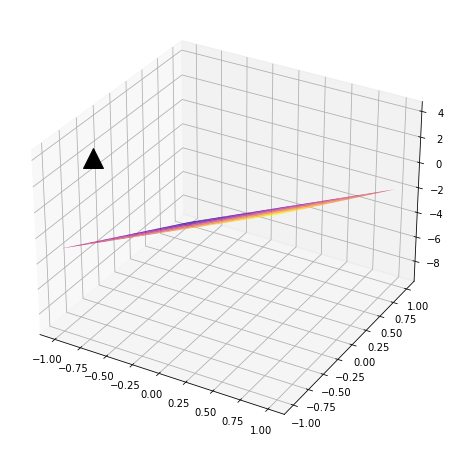

In [5]:
# Definindo um ponto qualquer
x = torch.Tensor([[-1, -0.5, 2]])
y = perceptron(x)
# Seu valor de saída no perceptron é
print(y)
# E sua localização no plano:
perceptron_plot_3d(perceptron)
plt.plot([-1], [-0.5], [2],  color='k', marker='^', markersize=20)

# 04. Funções de ativação

Montou-se um caso de classificação linear ajustado manualmente para visualizar o retorno de algumas funções de ativações diferentes de acordo com o posicionamento dos pontos no plano.

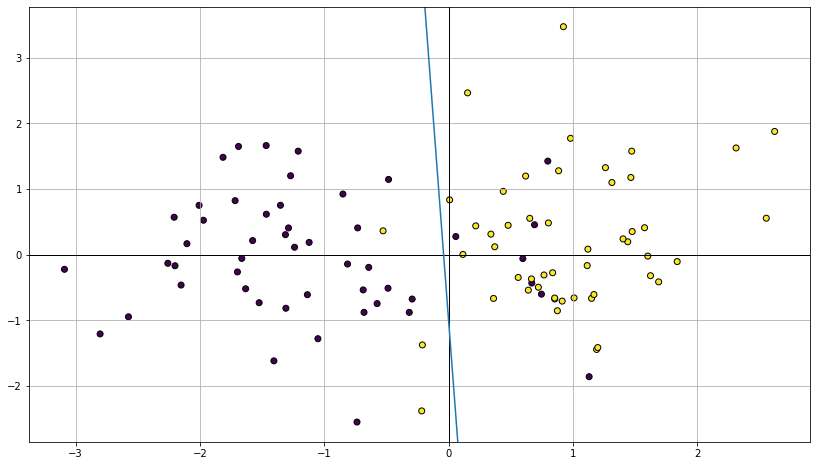

In [6]:
np.random.seed(333)

x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

# Visualização do sistema de pontos/função de aproximação
plt.figure(figsize=(14,8))
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, edgecolor='k')
perceptron_plot_2d(25, 1, 1)
plt.grid(axis='both')
plt.show()

In [7]:
# Perceptron ajustado com os parâmetros encontrados anteriormente

perceptron_04 = nn.Linear(2, 1)
# Função de ativação do tipo sigmóide
activation = nn.Sigmoid()
# Parâmetros
perceptron.weight = nn.Parameter(torch.Tensor([[15, 1]]))
perceptron.bias = nn.Parameter(torch.Tensor([1]))

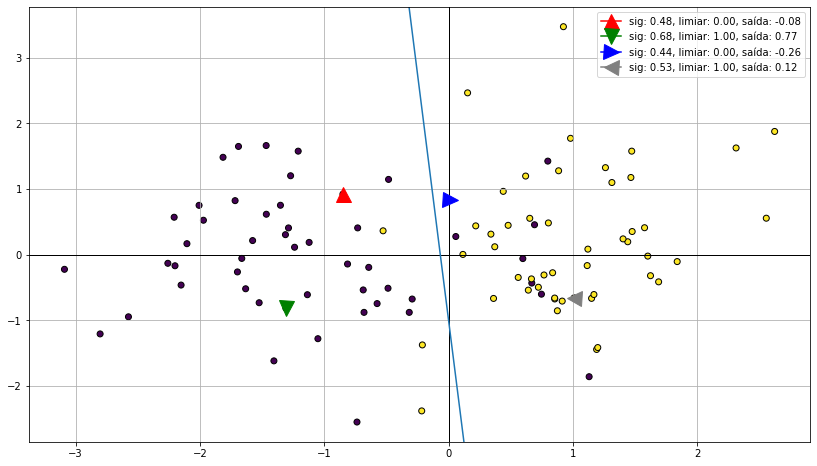

In [8]:
# Montando a vizualização, para 4 pontos diferentes, de 2 funções além do valor de saída do perceptron:
pontos = [48, 47, 75, 69]

markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(14, 8))
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, edgecolor='k')
perceptron_plot_2d(15, 1, 1)

# Gerando as ativações
for count, ind in enumerate(pontos):
    ponto = torch.Tensor(x[ind])
    # Ativação (1): Sigmoide
    val = perceptron_04(ponto)
    ativacao_sig = activation(val)
    # Ativação (2): Limiar
    ativacao_limiar = 0 if val.data < 0 else 1
    # Guardando texto para legenda e graficando o ponto
    label = f'sig: {ativacao_sig.data.numpy()[0]:.2f}, limiar: {ativacao_limiar:.2f}, saída: {val.data.numpy()[0]:.2f}'
    plt.plot(ponto[0], ponto[1], label=label, marker=markers[count], color=colors[count], markersize=15)

plt.legend()
plt.grid('both')
plt.show()
# Gráfico

O valor dado pela função limiar mostra, simplesmente, qual o veredito dado pelo sistema de classificação após a saída. Já o valor resultante da função de ativação sigmóide (que geralmente tem sua decisão aproximada por 0 ou 1 dependendo do valor estar acima ou abaixo de 0.5) exibe qual a certeza da decisão além de, nesse contexto bidimensional, fornecer uma ideia da proximidade do ponto em relação à reta. 

Os resultados 'sig' foram dados justamente numa faixa ambígua porque, nesse caso, gerou-se entradas (x) entre -1 e 1 e, na documentação do pytorch, a sigmoide padrão se aproxima da resposta (y) a partir de -4 e 4; ou seja, nos valores fornecidos ela não tem muita 'certeza' da predição.

# 05. Redes Neurais

Para dados cuja disposição não é linearmente separável, as configurações anteriores falham em atingir um boa grau de separação. Para esse caso, no exemplo de duas dimensões, os valores sempre passam por uma função linear e a fronteira de separação resultante torna-se uma reta; ao introduzir não linearidades na transformação (por meio das funções de ativação), o resultado possui uma adaptação muito mais satisfatória em relação à fronteira de decisão.

Isso pode ser visto no visualizador online de *deep learning* da universidade de Stanford. Caso a função de ativação da camada escondida seja retirada a fronteira torna-se uma reta e a separação nunca  consegue ser 'boa'.
https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

Existem, basicamente, duas maneiras de montar uma rede neural no *framework* PyTorch: a função Sequential ou a classe Module, com uma estrutura obecendo às especificações da documentação em https://pytorch.org/docs/stable/generated/torch.nn.Module.html

Dados gerados pelo make_moons, do sklearn.datasets, serão usados mas ainda **sem treinar** a rede neste curso.

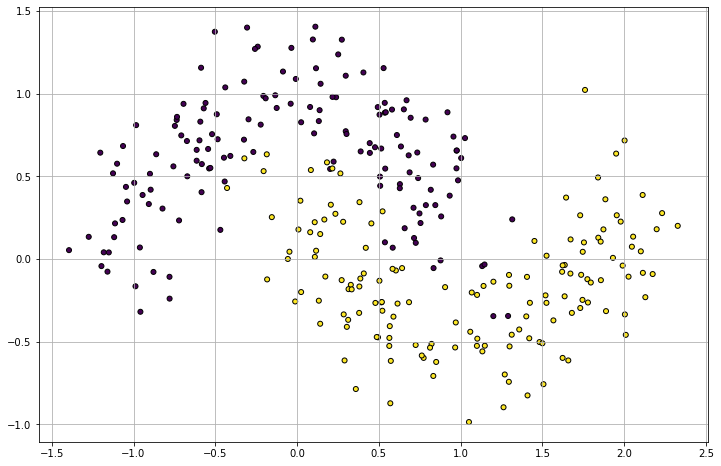

In [9]:
# Geração de dados não lineares
x, y = make_moons(n_samples=300, noise=0.2)
x_tensor = torch.from_numpy(x).float()
# Gráfico de espalhamento
plt.figure(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.grid('both')
plt.show()

In [10]:
input_size = 2
hidden_size = 8
output_size = 1

### *Sequential*

In [11]:
sequencial = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features=output_size)
)
# Sumário do modelo (existe também a função summary à la Keras, com o *https://github.com/sksq96/pytorch-summary*)
print(sequencial)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [12]:
# Ativar o forward
pred_seq = sequencial(x_tensor)
# Formato dos tensores input e predição
print(x_tensor.shape)
print(pred_seq.shape)

torch.Size([300, 2])
torch.Size([300, 1])


### *Module*

In [13]:
class MinhaRede(nn.Module):
    # Estrutura da rede neural
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
    # Comportamento do fluxo forward
    def forward(self, x):
        hidden = self.relu(self.hidden(x))
        output = self.output(hidden)
        return output

In [14]:
# Instância da classe MinhaRede
mod = MinhaRede(input_size, hidden_size, output_size)
# Sumário (igual à rede Sequential mas, agora, as camadas possuem os nomes dos atributos da classe)
print(mod)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [15]:
# Ativar o forward
pred_mod = mod(x_tensor)
# Formatos
print(x_tensor.shape)
print(pred_mod.shape)

torch.Size([300, 2])
torch.Size([300, 1])


### GPU

Para redes neurais, na maioria das vezes é conveniente realizar o treinamento em GPUs, já que a especialidade dessas unidades é o processamento de cálculos de maneira paralelizada, aderindo à premissa das redes. O PyTorch fornecesse a possibilidade de utilizar a GPU da máquina para o treinamento desses modelos, basta mover ambos o conjunto de dados e o modelo em si para a unidade, além de defini-la como o dispositivo de uso do torch.

In [16]:
# Verificando o dispositivo disponível
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [17]:
%%time
# Alocando o modelo na GPU
mod = mod.to(device)
# Alocando o conjunto de dados na GPU
x_tensor = x_tensor.to(device)

CPU times: total: 109 ms
Wall time: 99 ms


Esse é, na verdade, um dos casos em que essa transferência **pode** ser mais custosa do que simplesmente treinar na CPU. Os dados de entrada possuem dimensão 2 e apenas 300 amostras, então a rede treinaria muito rápido, de forma que a transferência dos dados para a GPU demoraria mais do que o treinamento em si. Dificilmente o caso é esse já que a própria aplicação das técnicas de aprendizado profundo requerem conjuntos de dados extensos, mas vale o comentário.

Há diversos posts/artigos que comentam sobre o porquê de utilizarmos GPUs e sobre o aspecto acima, como:
https://www.analyticsvidhya.com/blog/2017/05/gpus-necessary-for-deep-learning/
https://developer.nvidia.com/deep-learning
https://www.sciencedirect.com/science/article/abs/pii/S0031320304000524?via%3Dihub